In [1]:
#Importing the Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')

In [3]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',')

In [6]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
training = np.array(fashion_train_df, dtype = 'float32')

In [11]:
testing = np.array(fashion_test_df, dtype = 'float32')

In [43]:

#Visualising the data


2.0

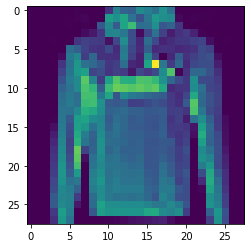

In [67]:
import random
i= random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

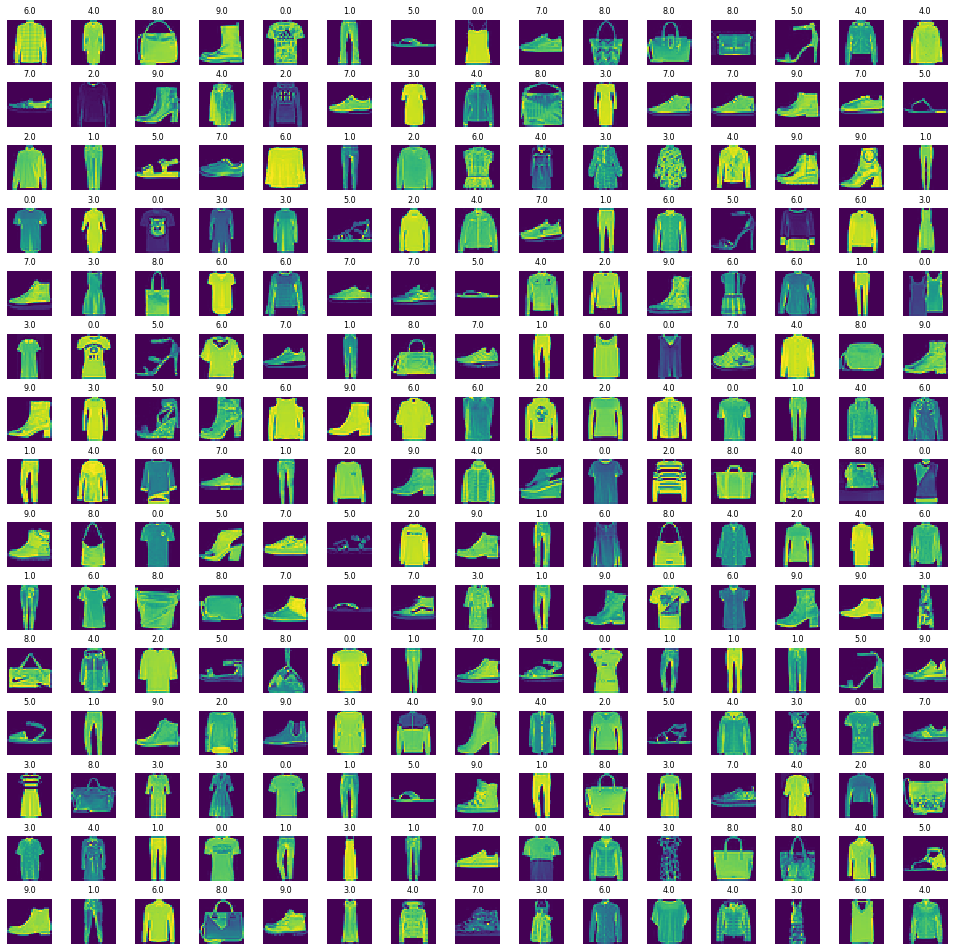

In [69]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
#Training the model

In [70]:
X_train = training[:, 1:]/255
y_train = training[:,0]

In [71]:
X_test = testing[:, 1:]/255
y_test = testing[:,0]

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2,random_state =12345)

In [80]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [81]:
X_train.shape

(48000, 28, 28, 1)

In [82]:
import keras

Using TensorFlow backend.


In [83]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [84]:
cnn_model = Sequential()

In [86]:
cnn_model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))

In [87]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [88]:
cnn_model.add(Flatten())

In [89]:
cnn_model.add(Dense(output_dim =32, activation='relu'))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [90]:
cnn_model.add(Dense(output_dim =10, activation='sigmoid'))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [91]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer =Adam(lr=0.001),metrics=['accuracy'])

In [92]:
epochs = 50

In [93]:
cnn_model.fit(X_train,
             y_train,
             batch_size=512,
             nb_epoch = epochs,
             verbose = 1,
             validation_data=(X_validate,y_validate))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 76s 2ms/step - loss: 1.0485 - accuracy: 0.5372 - val_loss: 0.5274 - val_accuracy: 0.8073
Epoch 2/50
48000/48000 [==============================] - 84s 2ms/step - loss: 0.4763 - accuracy: 0.8310 - val_loss: 0.4229 - val_accuracy: 0.8470
Epoch 3/50
48000/48000 [==============================] - 71s 1ms/step - loss: 0.4048 - accuracy: 0.8561 - val_loss: 0.3788 - val_accuracy: 0.8641
Epoch 4/50
48000/48000 [==============================] - 74s 2ms/step - loss: 0.3718 - accuracy: 0.8699 - val_loss: 0.3541 - val_accuracy: 0.8806
Epoch 5/50
48000/48000 [==============================] - 69s 1ms/step - loss: 0.3357 - accuracy: 0.8835 - val_loss: 0.3280 - val_accuracy: 0.8836
Epoch 6/50
48000/48000 [==============================] - 69s 1ms/step - loss: 0.3207 - accuracy: 0.8880 - val_loss: 0.3171 - val_accuracy: 0.8903
Epoch 7/50
48000/48000 [==============================] - 70s 1ms/st

In [94]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 6s 588us/step
Test Accuracy: 0.911


In [95]:
predicted_classes = cnn_model.predict_classes(X_test)

In [96]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

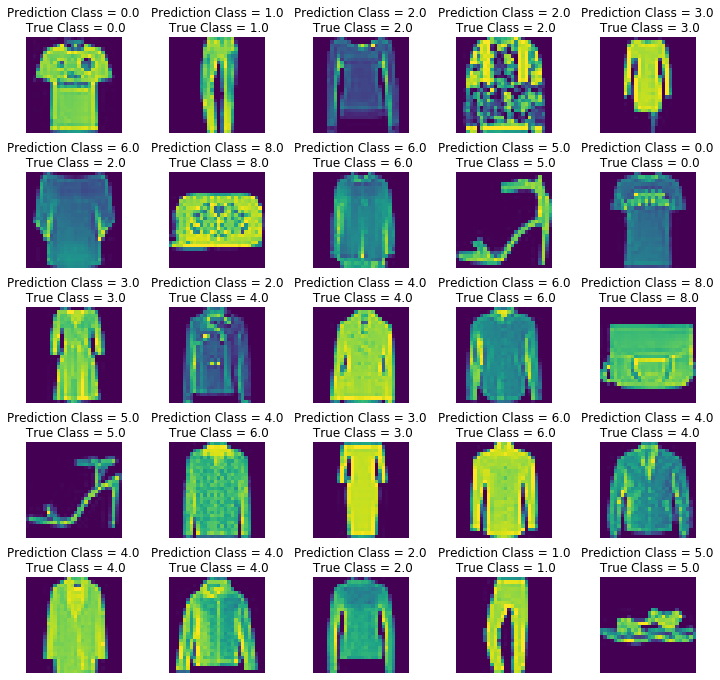

In [97]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

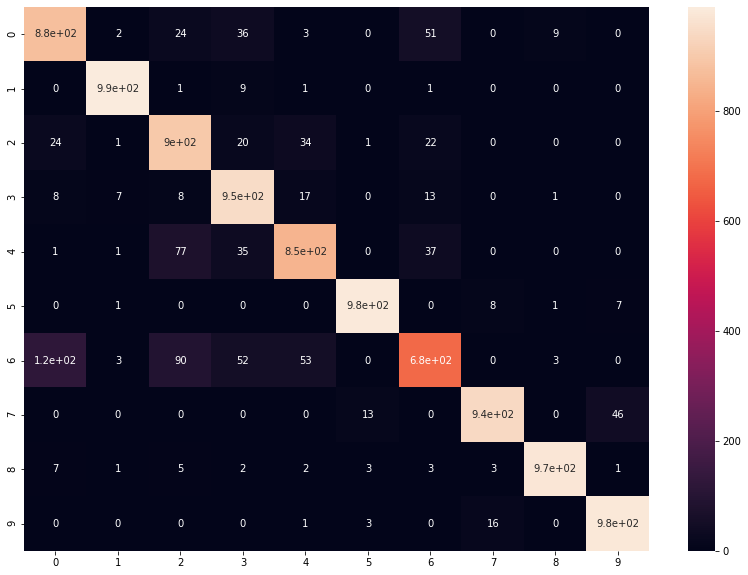

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values